# Gradient Descent #

The Rosenbrock function is a famous non-convex function that is used to ex- plore optimization algorithms. This simple 2-D function has some very tricky structure.

<img src="img/p2-eq.png" alt="drawing" width="400"/>

1. What are the partial derivatives of f with respect to x and to y?

* df_dx = 2*(200*x^3 - 200*x*y + x - 1)
* df_dy = 200*(y - x^2)

2. Create a visualization of the contours of the Rosenbrock function.

In [1]:
def rosenbrock(x,y):
      return (1-x)**2 + 100* ((y-x**2))**2

    
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
font_cache_path = mpl.get_cachedir() + '/fontList.cache'
%rm $font_cache_path

fig = plt.figure()
ax = fig.gca(projection='3d')

s = 0.05   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)  #Try coolwarm vs jet
 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

#Displays the figure, handles user interface, returns when user closes window
#plot.show()

rm: /Users/kornraphop/.matplotlib/fontList.cache: No such file or directory


(-1.0, 2)

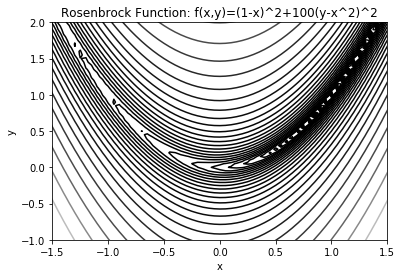

In [2]:
plt.clf()
plt.contour(X,Y,Z,np.logspace(-1, 3, 31),cmap='gray')
plt.title(r'Rosenbrock Function: f(x,y)=(1-x)^2+100(y-x^2)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.5, 1.5)
plt.ylim(-1., 2)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [3]:
def grad_f(vector):
    x, y = vector
    df_dx = 2.*(200.*x*x*x - 200.*x*y + x - 1.)
    df_dy = 200.*(y - x*x)
    return np.array([df_dx, df_dy])

In [4]:
def grad_descent(starting_point=None, iterations=10, learning_rate=0.001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

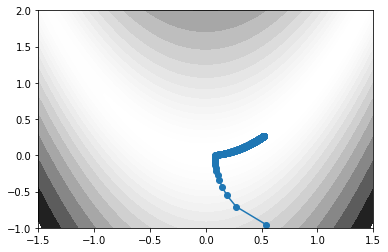

In [5]:
# learning_rate=0.001
plt.clf()

np.random.seed(10)
traj = grad_descent(iterations=500,learning_rate=0.001)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

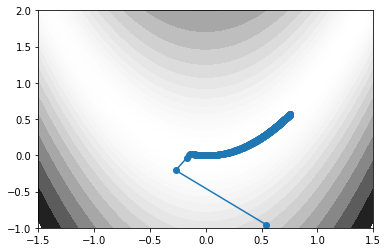

In [6]:
# learning_rate=0.003
plt.clf()

np.random.seed(10)
traj = grad_descent(iterations=500,learning_rate=0.003)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

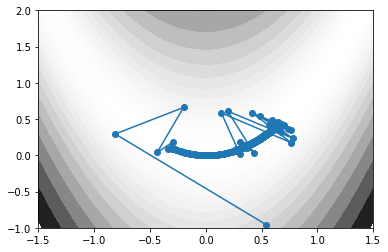

In [7]:
# learning_rate=0.005
plt.clf()

np.random.seed(10)
traj = grad_descent(iterations=500,learning_rate=0.005)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [8]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point != None:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

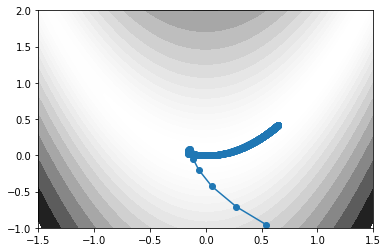

In [9]:
# learning_rate=0.001
plt.clf()

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=500,epsilon=0.001, alpha=0.5)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

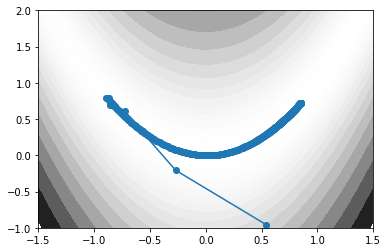

In [10]:
# learning_rate=0.003
plt.clf()

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=500,epsilon=0.003, alpha=0.5)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/kornraphop/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kornraphop/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kornraphop/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


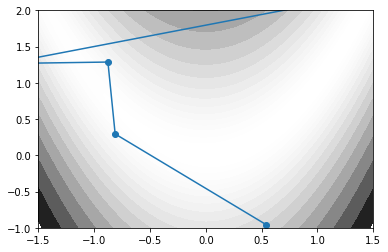

In [11]:
# learning_rate=0.005
plt.clf()

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=500,epsilon=0.005, alpha=0.5)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1., 2.)


x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')